https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642  
https://github.com/YuehHanChen/Marketing_Analytics  
https://www.kaggle.com/jackdaoud/marketing-data

### Roadmap
1. Pacotes importados  
2. Obtenção dos dados  
3. Análise Exploratória - *(Don’t skip this step, but don’t get stuck on it either.)*  
   Limpeza dos dados - *(Better data beats fancier algorithms)*
4. Feature Engineering - *(Keep only what matters)*
5. Insights
6. Seleção dos algorítmos
7. Treinamento e otimização dos modelos  
8. Avaliação dos modelos
9. Seleção do modelo


--- 
## 1. Pacotes importados

In [1]:
from datetime import date
from datetime import datetime
from itertools import combinations
import math

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sb
import Orange

# Tratar desbalanceamento de classes
from imblearn.over_sampling import SMOTE

# sklearn ---------------------------------------------------------------------------
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.neighbors import KNeighborsClassifier # k-Vizinhos mais Próximos
from sklearn.tree import DecisionTreeClassifier    # Árvores de Decisão
from sklearn.naive_bayes import GaussianNB         # Naïve Bayes
from sklearn.svm import SVC                        # Máquinas de Vetores de Suporte

# Técnicas de pré-processamento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

# Técnicas de avaliação/validação
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from scipy.stats import wilcoxon

# configurações --------------------------------------------------------------------
# mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
%matplotlib inline

--- 
## 2. Obtenção dos dados

In [2]:
# fazendo o download do git e salvando na máquina (apenas a primeira vez)
#df = pd.read_csv("https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv")
#df.to_csv('ml_project1_data.csv', index=False)

df = pd.read_csv("ml_project1_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

--- 
## 3. Análise Exploratória + Limpeza dos Dados

Qual a variável alvo (target) ?  
Os valores em cada coluna fazem sentido?   
Os valores estão na escala correta?  
Há outliers?  
Que produto melhor performou?  
Que canal mais vendeu?  
Alguma relação entre:
- produto e canal?
- reclamação e venda?
- venda e nível de educação / estado civil / receita / filhos ?



In [5]:
# 1) Quantas observações?
df.shape

(2240, 29)

In [6]:
# 1) Quais são os tipos de dados? (numérico/categórico)
# 2) Dados faltantes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Coluna "Income" possui números faltantes
# 1) Antes de analisá-los e definir uma tratativa, verificar o perfil dos dados de cada coluna.
include =['object', 'float', 'int']
df.describe(include=include)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [8]:
# 1) Verificar proporção da coluna target
df["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

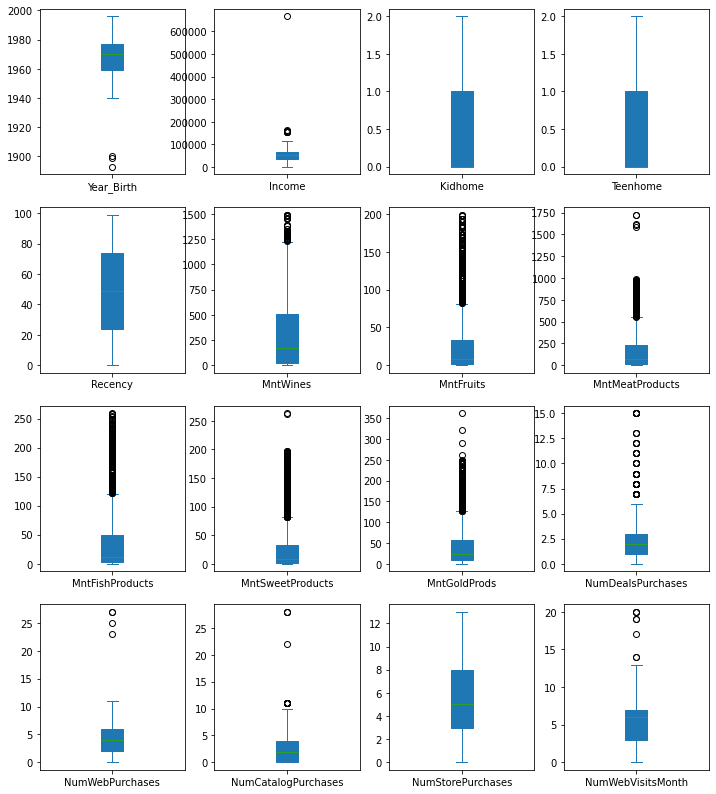

In [9]:
# Verificar possíveis outliers
df_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                            'Response', 'Complain', 'Z_CostContact', 'Z_Revenue'])
df_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)

Shape pós remoção dos outliers: (2236, 29) 
Linhas deletadas: 4


Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

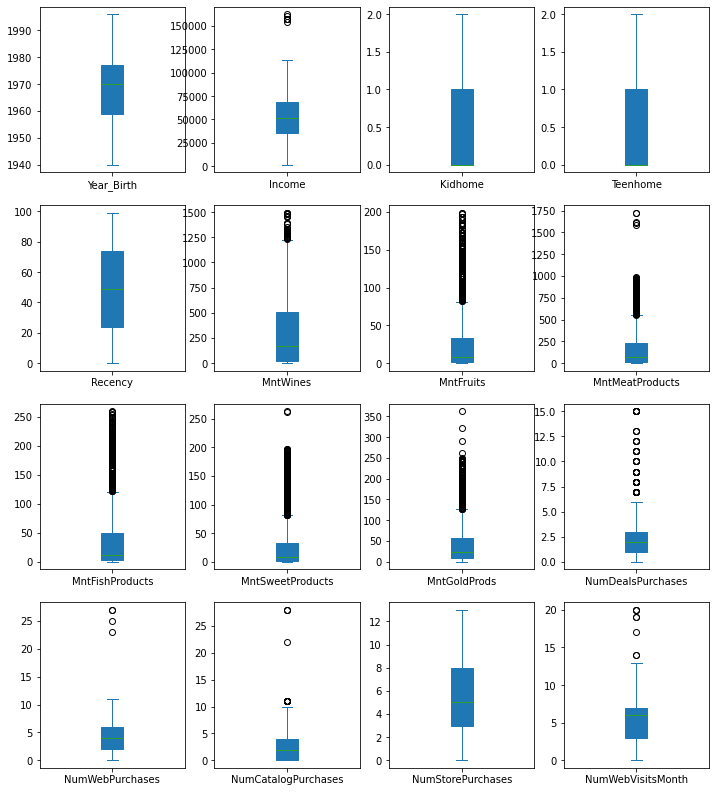

In [10]:
# Retirando os outliers nas colunas:
# Year_birth: valores < 1930
# Income: valores > 600k

df_transf = df.query(' (Year_Birth >= 1930) & ( (Income < 200000) | (Income.isnull()) ) ').copy()
print(f"Shape pós remoção dos outliers: {df_transf.shape} \nLinhas deletadas: {df.shape[0] - df_transf.shape[0]}")

# Reimprimindo boxplot
df_plot = df_transf.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                    'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue'])
df_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)

In [11]:
# criando um flag para registros sem Income, para verificar o perfil se altera comparado às demais colunas numéricas
df_transf['notincome'] = df_transf.Income.isnull()==True
df_transf['notincome'].value_counts()

False    2212
True       24
Name: notincome, dtype: int64

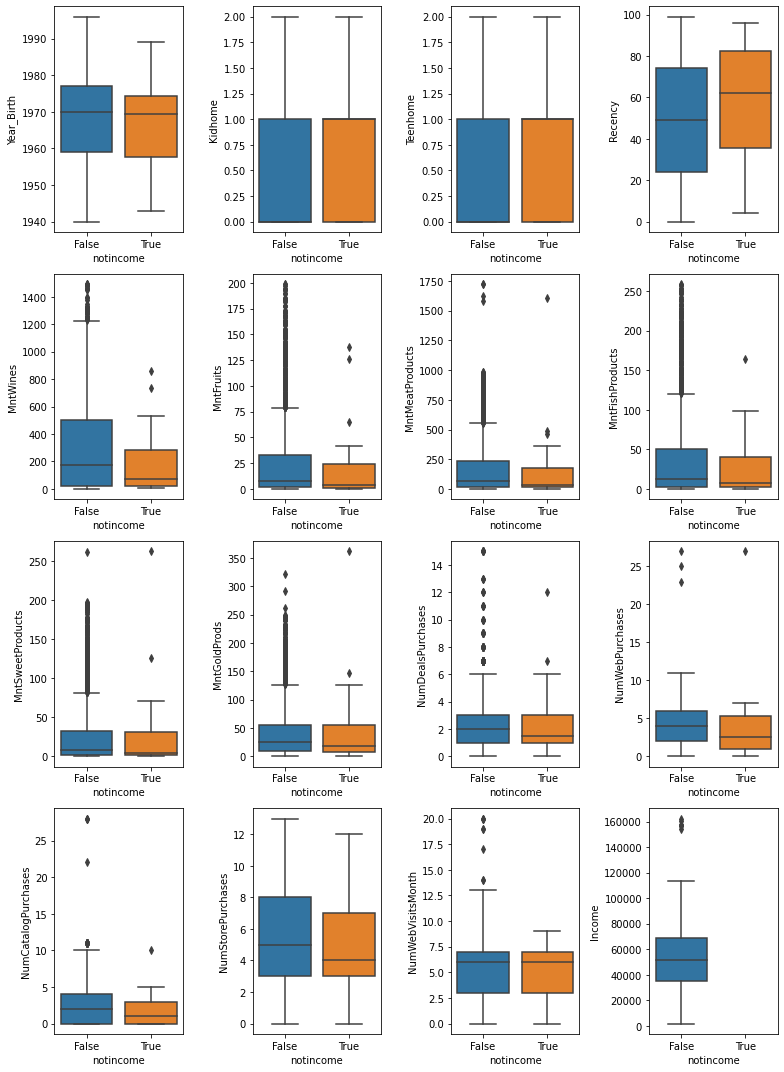

In [12]:
df_plot = df_transf.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                    'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue'])

names = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
        'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

f, axes = plt.subplots(round(len(names)/4), 4, figsize=(11,15))  
y=0

for i, name in enumerate(names):
    i, j = divmod(y, 4)
    sb.boxplot(  y=name, x= "notincome", data=df_plot,  orient='v' , ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Frequency'>

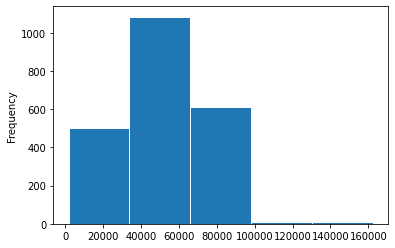

In [13]:
df_transf["Income"].plot(kind="hist", edgecolor="white", bins=5)

In [14]:
# Perfil das linhas que não possui Income não se altera comparado das que possuem (gráficos boxplot).
# Considerando também que a distribuição dos valores de Income tem um perfil normal, aptei por preencher
# as 24 linhas de valores nulos com a média.

df_transf["Income"].fillna(df_transf["Income"].mean(), inplace=True)
df_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Dt_Customer          2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [15]:
# Ações:
# 1) Excluir Colunas Z_... náo fazem parte do dicionário de dados
# 2) Transformar coluna de Dt_Customer
# 3) Verificar as freq das colunas categóricas
#    Demais colunas, aparentemente sem inconsistências.
# 4) Verifica outliers nas colunas: Year_birth, Income, 

df_transf2 = df_transf.copy()
df_transf2.drop(['Z_CostContact', 'Z_Revenue', 'notincome'], axis=1, inplace=True)
print(df_transf2.columns, "\n")

#df_transf2["Dt_Customer"] = pd.to_datetime(df_transf2["Dt_Customer"])
df_transf2["Dt_Customer"] = df_transf2["Dt_Customer"].astype('datetime64[ns]')
print(df_transf2.Dt_Customer.dtypes, "\n")

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object') 

datetime64[ns] 



Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

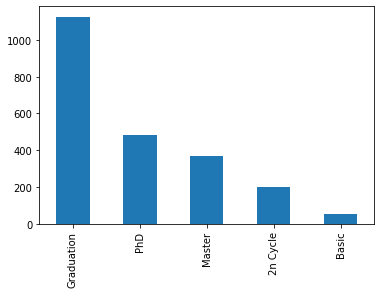

In [16]:
df_transf2['Education'].value_counts().plot(kind='bar')
df_transf2['Education'].value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

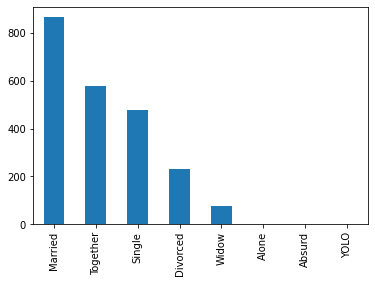

In [17]:
df_transf2['Marital_Status'].value_counts().plot(kind='bar')
df_transf2['Marital_Status'].value_counts()

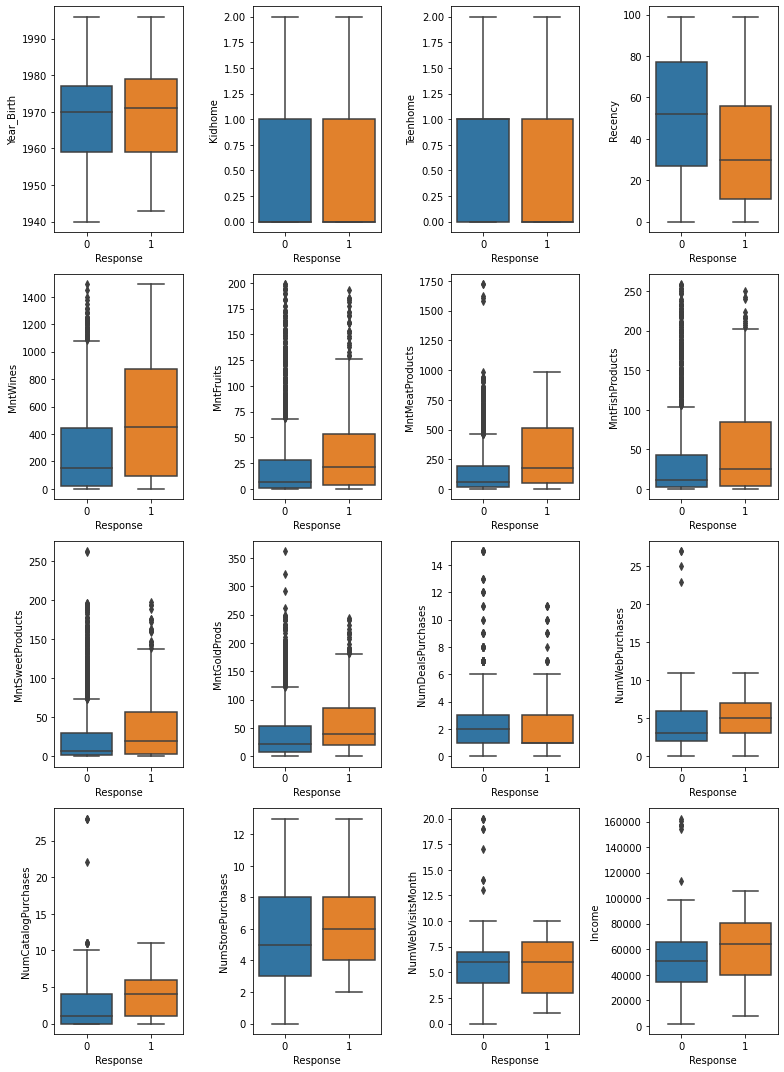

In [18]:
# Atributos categóricos com poucas observações. Potencial para reduzir as classes.
# Antes, vamos analisar as distribuições dos atributos por Response.

df_plot = df_transf2.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                    'AcceptedCmp5', 'Complain'])

names = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

f, axes = plt.subplots(round(len(names)/4), 4, figsize=(11,15))  
y=0

for i, name in enumerate(names):
    i, j = divmod(y, 4)
    sb.boxplot(  y=name, x= "Response", data=df_plot,  orient='v' , ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [19]:
df_transf2[df_transf2['Response']==1].Recency.quantile([0.25,0.5,0.75])

0.25    11.0
0.50    30.0
0.75    56.0
Name: Recency, dtype: float64

<AxesSubplot:>

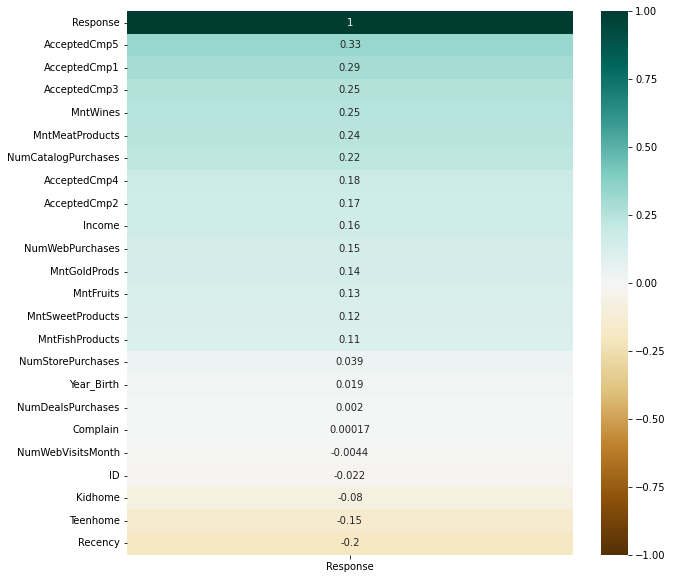

In [20]:
# Nada muito discrepante entre os cenários.
# Vamos analisar as correlações dos atributos com a coluna target.
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap( df_transf2.corr()[["Response"]].sort_values( by = 'Response', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='BrBG')


---  
## 4. Feature Engineering

In [21]:
# Ações:
# 1 - Editar coluna Education - Agrupar as classes: 2n Cycle + Basic
# 2 - Editar coluna Marital_Status -    Agrupar Single + Alone
#                                       Excluir: Absurd, YOLO
# 3 - Criar coluna AcceptedCmp - considerando colunas Cmp1~Cmp5
# 4 - Criar coluna Total_mnt - soma das colunas 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
# 5 - Criar coluna Total_num_purchase - 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
# 6 - Criar coluna Average_Order - Total_Mnt / Total_num_purchase
# 7 - Criar coluna Minor - considerando colunas Kidhome e Teenhome
# 8 - Criar coluna com classes para Idade - baseado na coluna Year_birth
# 9 - Criar coluna com classes para Income
# 10 - Criar coluna com classes para Dt_Customer
# 11 - Recriar heatmap e analisar

In [22]:
df_transf3 = df_transf2.copy()
# 1
df_transf3.loc[ (df_transf3["Education"] == '2n Cycle') | (df_transf3["Education"] == 'Basic'), "Education"] = 'Others'
# 2
df_transf3.loc[ (df_transf3["Marital_Status"] == 'Alone') , 'Marital_Status'] = 'Single'
df_transf3 = df_transf3[ (df_transf3["Marital_Status"] != 'Absurd') & (df_transf3["Marital_Status"] != 'YOLO')]
# 3
df_transf3["AcceptedCmp"] = np.where(df_transf3["AcceptedCmp5"] + df_transf3["AcceptedCmp4"] + df_transf3["AcceptedCmp3"] +
                                    df_transf3["AcceptedCmp2"] + df_transf3["AcceptedCmp1"] > 0, 1, 0)
# 4
df_transf3["TotalMnt"] = (df_transf3['MntFruits'] + df_transf3['MntMeatProducts'] + df_transf3['MntFishProducts'] + 
                        df_transf3['MntSweetProducts'] + df_transf3['MntGoldProds'])
# 5
df_transf3["TotalNumPurch"] = (df_transf3['NumDealsPurchases'] + df_transf3['NumWebPurchases'] + 
                                df_transf3['NumCatalogPurchases'] + df_transf3['NumStorePurchases'])
# 6
df_transf3["Average_Order"] = df_transf3["TotalMnt"] / df_transf3["TotalNumPurch"]
# 7
df_transf3["MinorFlag"] = np.where(df_transf3["Kidhome"] + df_transf3["Teenhome"] > 0, 1, 0)
df_transf3["MinorTotal"] = df_transf3["Kidhome"] + df_transf3["Teenhome"]
# 8
df_transf3["Age"] = date.today().year - df_transf['Year_Birth']
df_transf3["AgeClass"] = pd.cut( df_transf3['Age'], bins= [0,39,55,70,100], labels=['0_39','40_55','56_70','71+'])
# 9
df_transf3["IncomeClass"] = pd.cut( df_transf3['Income'], bins= [0,35000,65000,90000,float("Inf")], labels=['0_35','35_65','65_90','90+'])
# 10
df_transf3["CustPeriod"] = pd.to_datetime('today').floor('D') - df_transf3['Dt_Customer']
df_transf3["CustPeriod"] = df_transf3["CustPeriod"] / np.timedelta64(1,'Y')
df_transf3["CustPeriodClass"] = pd.cut( df_transf3['CustPeriod'], bins= [0,8,9,100], labels=['0_8','8_9','9+'])

In [23]:
df_transf3.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedCmp,TotalMnt,TotalNumPurch,Average_Order,MinorFlag,MinorTotal,Age,AgeClass,IncomeClass,CustPeriod,CustPeriodClass
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,0,632,18,35.111111,1,1,54,40_55,35_65,8.484774,8_9
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1,38,22,1.727273,1,3,75,71+,35_65,7.493651,0_8
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1,333,19,17.526316,0,0,40,40_55,35_65,7.866007,0_8
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,0,415,23,18.043478,1,1,65,56_70,65_90,7.868745,0_8
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1,0,88,11,8.000000,1,2,67,56_70,35_65,9.144609,9+


<AxesSubplot:>

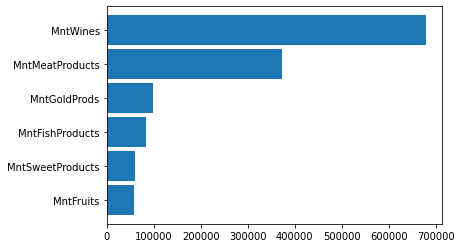

In [97]:
plot_sum = df_transf3[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
plot_sum = plot_sum.sum()
plot_sum.sort_values(ascending=True).plot.barh(width = .9)

<AxesSubplot:>

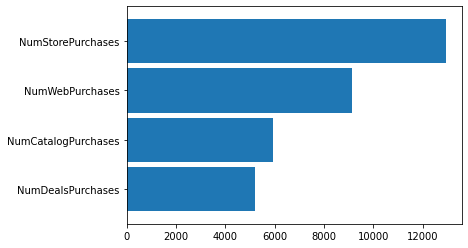

In [99]:
plot_sum = df_transf3[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
plot_sum = plot_sum.sum()
plot_sum.sort_values(ascending=True).plot.barh(width=0.9)

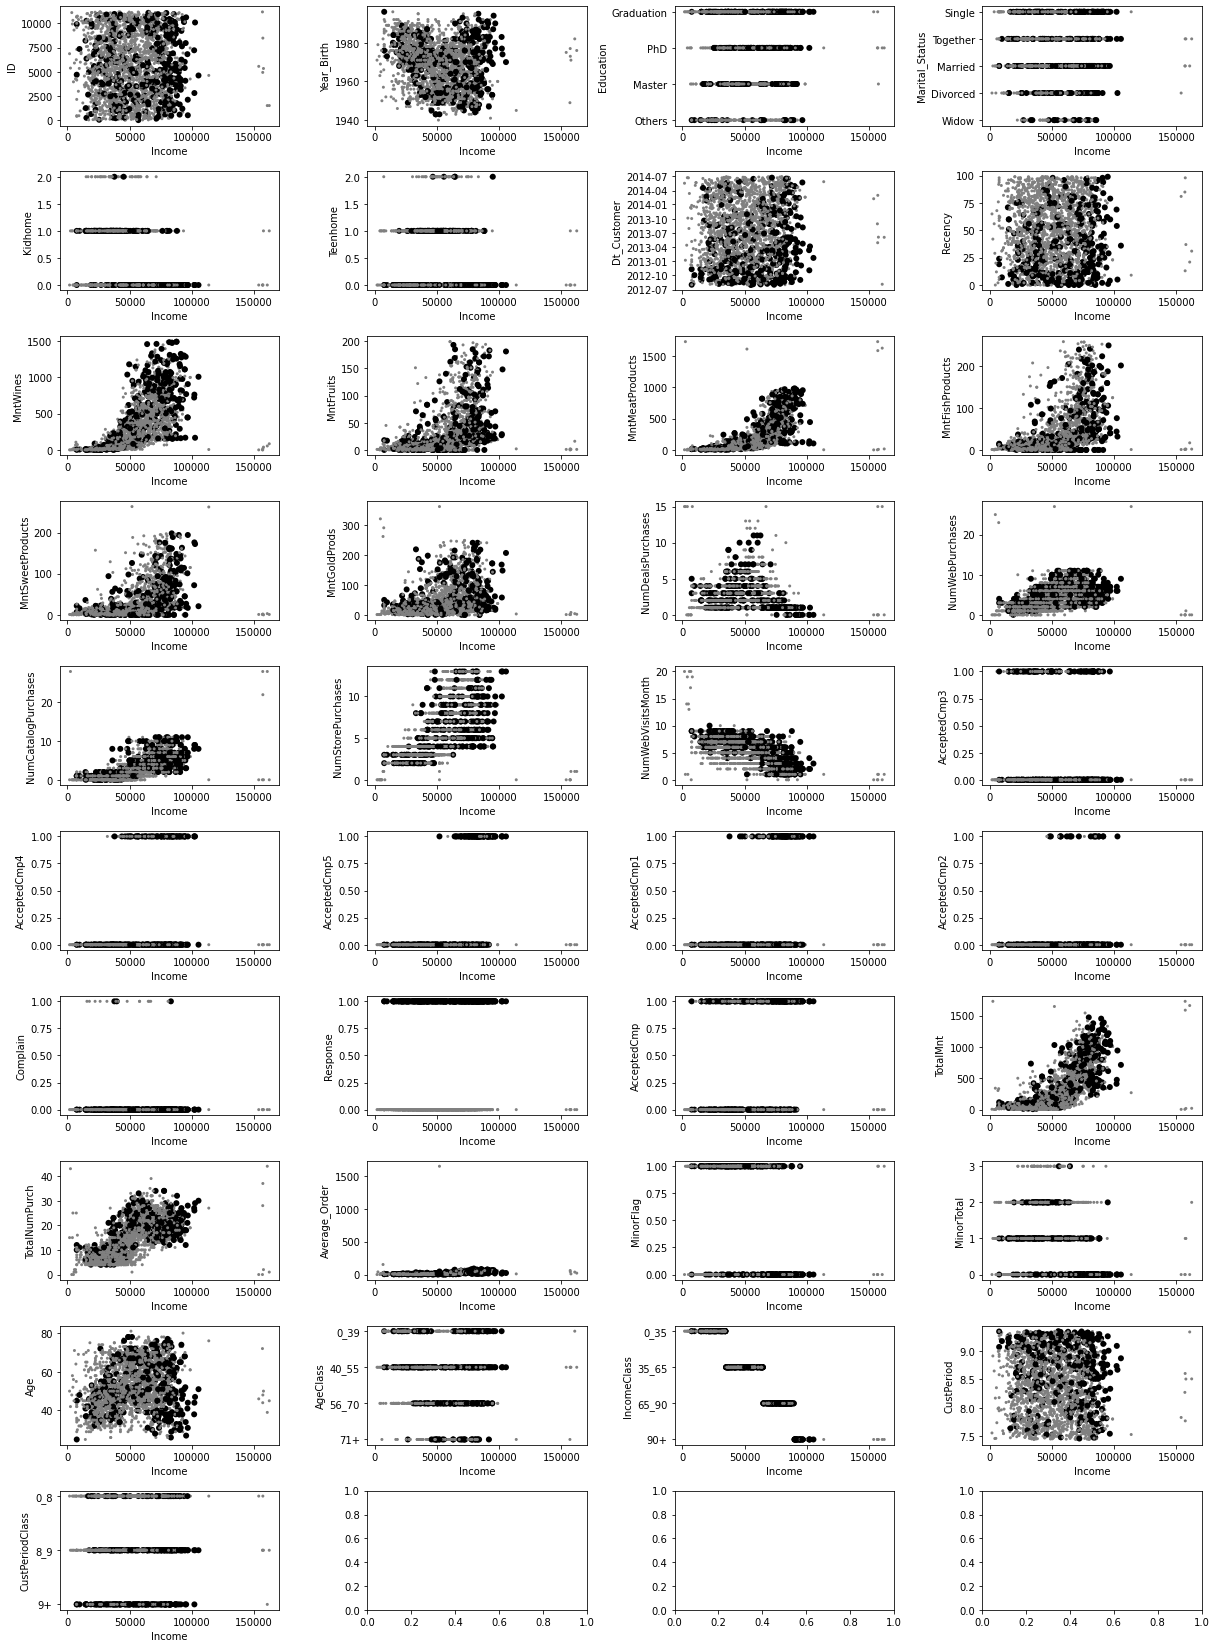

In [24]:
# Explorando relações entre Income e demais atributos
# Trocar apenas a variável x e hue pela coluna que deseja ver a relação com as demais
x = 'Income'
hue = 'Response'
markers = {0: ".", 1: "o"}
palette = ["gray", "k"]

#names = [coluna for coluna in df_transf3 if coluna != x and df_transf3[coluna].dtype in ['int64', 'int32', 'float64'] ]
names = [coluna for coluna in df_transf3 if coluna != x ]

f, axes = plt.subplots(math.ceil(len(names)/4), 4, figsize=(17,23)) 
y=0

for name in names:
    i, j = divmod(y, 4)
    sb.scatterplot(  y=name, x= x, data=df_transf3, ax=axes[i, j], hue=hue, style=hue, markers=markers, palette=palette, linewidth=0)
    axes[i, j].legend([],[], frameon=False) # tirar a legenda de cada gráfico
    y+=1

plt.tight_layout()
plt.show()

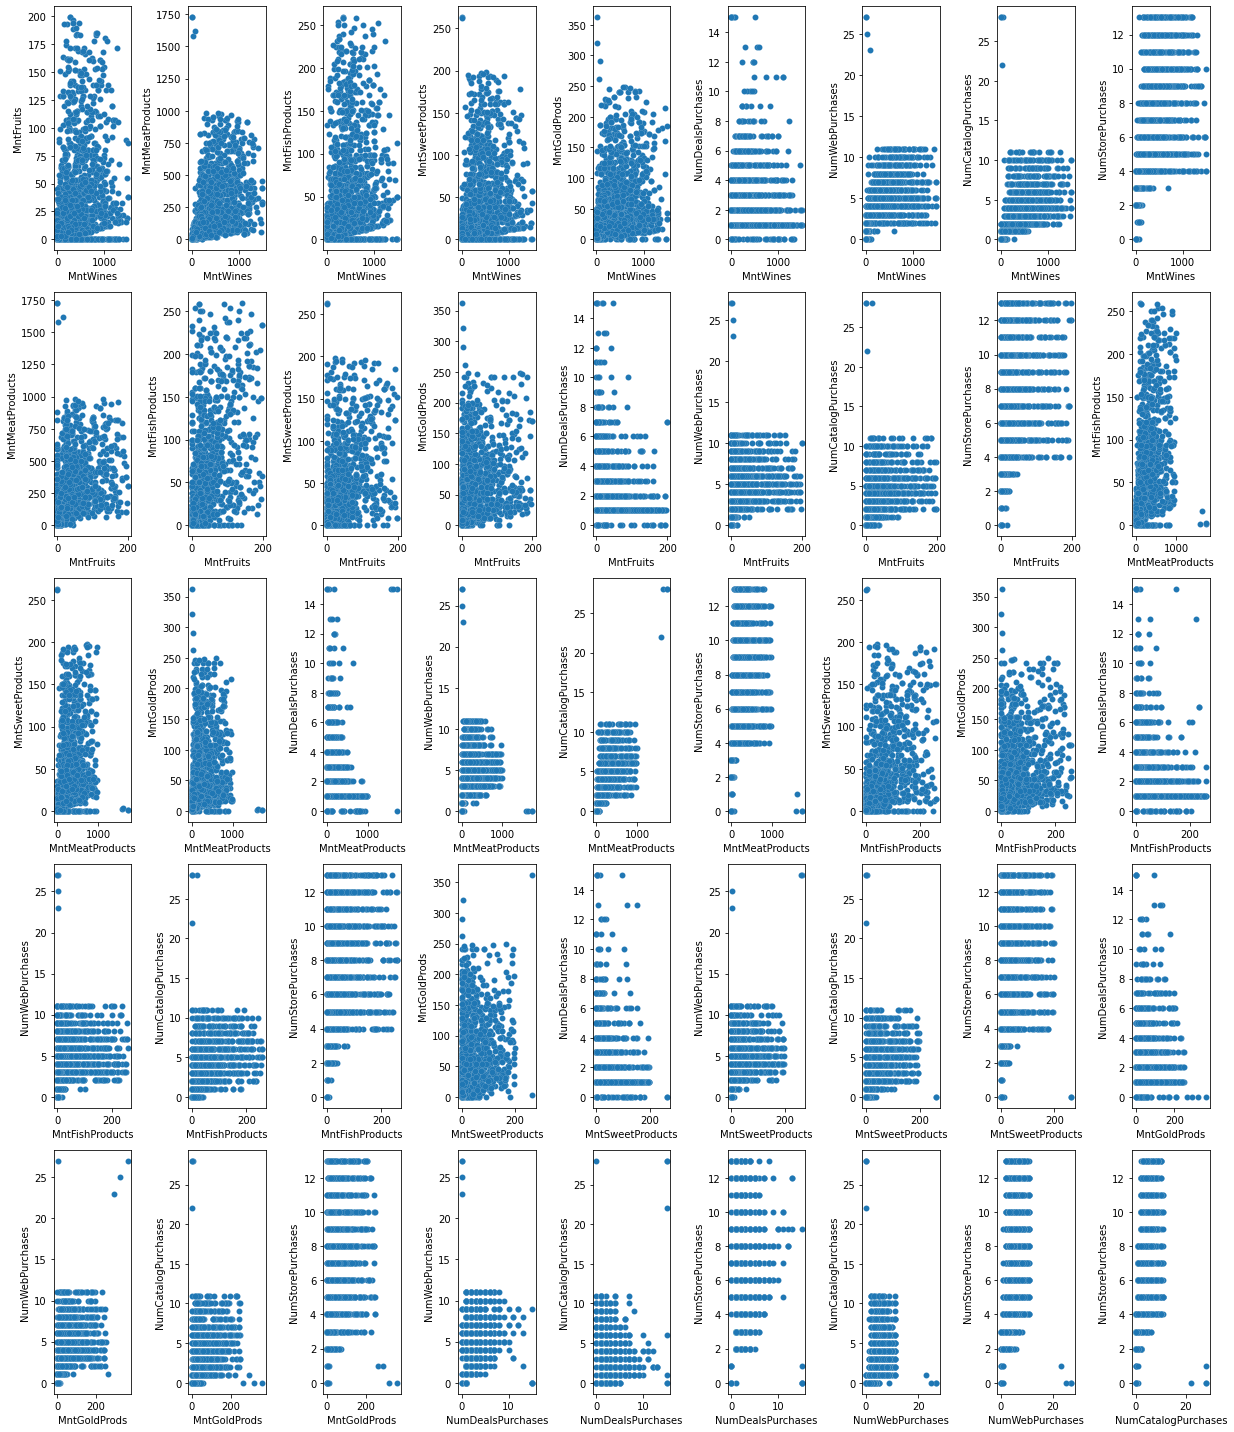

In [103]:
# Explorando relações entre atributos Mnt e NumPurch
#names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
#names = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

comb = combinations(names, 2)
f, axes = plt.subplots( round( len(names)/2), len(names)-1, figsize=(17,20)) 
axy=0

for x, y in comb:
    i, j = divmod(axy, len(names)-1)
    sb.scatterplot(  y= y, x= x, data=df_transf3, ax=axes[i, j], linewidth=0.1)
    axes[i, j].legend([],[], frameon=False) # tirar a legenda de cada gráfico
    axy+=1

plt.tight_layout()
plt.show()

In [104]:
# Possui um valor de Average Order bem discrepante dos demais.

#df_transf3[df_transf3['Average_Order']>1500]
#df_transf3[df_transf3['TotalNumPurch']==0]
df_transf3 = df_transf3[df_transf3.Average_Order < 1500]
df_transf3.sort_values('Average_Order', ascending=False).head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedCmp,TotalMnt,TotalNumPurch,Average_Order,MinorFlag,MinorTotal,Age,AgeClass,IncomeClass,CustPeriod,CustPeriodClass
1328,4246,1982,Master,Single,6560.0,0,0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,0,306,2,153.000000,0,0,39,0_39,0_35,7.986475,0_8
126,11071,1984,Graduation,Single,79607.0,0,0,2013-04-21,37,450,133,951,173,0,216,1,3,6,6,1,0,0,0,0,0,0,1,0,1473,16,92.062500,0,0,37,0_39,65_90,8.629883,8_9
1813,10513,1992,Graduation,Together,63207.0,0,0,2013-01-20,68,438,169,565,91,169,70,1,2,3,6,7,0,0,0,1,0,0,0,1,1064,12,88.666667,0,0,29,0_39,35_65,8.879032,8_9
546,10955,1964,Graduation,Widow,85620.0,0,0,2014-01-07,68,416,46,925,60,107,46,1,3,6,4,1,0,0,0,0,0,0,1,0,1184,14,84.571429,0,0,57,56_70,65_90,7.915289,0_8
723,10936,1965,Graduation,Married,72190.0,0,0,2013-02-13,79,597,166,597,172,166,249,1,5,6,4,3,0,0,0,0,0,0,0,0,1350,16,84.375000,0,0,56,56_70,65_90,8.813323,8_9
644,1173,1947,Master,Together,77632.0,0,0,2013-03-10,73,1200,105,758,0,42,147,1,4,2,6,2,0,1,1,0,0,0,1,1,1052,13,80.923077,0,0,74,71+,65_90,8.744875,8_9
2151,7233,1972,Graduation,Married,69209.0,0,0,2012-09-17,4,496,32,849,229,48,128,2,5,3,6,4,0,0,0,1,0,0,0,1,1286,16,80.375000,0,0,49,40_55,65_90,9.221271,9+
1298,1577,1946,Graduation,Married,78569.0,0,0,2014-02-19,14,558,79,622,207,175,95,1,4,6,4,1,0,0,1,0,0,0,1,1,1178,15,78.533333,0,0,75,71+,65_90,7.797559,0_8
116,1592,1970,Graduation,Married,90765.0,0,0,2014-01-24,25,547,99,812,151,82,33,0,4,6,5,1,0,0,1,1,0,0,0,1,1177,15,78.466667,0,0,51,40_55,90+,7.868745,0_8
790,6543,1945,Master,Together,62847.0,0,0,2013-01-15,45,521,168,706,80,76,61,1,3,6,4,2,0,0,0,0,0,0,0,0,1091,14,77.928571,0,0,76,71+,35_65,8.892722,8_9


C:\Users\mmm_n\AppData\Local\Temp/ipykernel_7344/2508747263.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))


<AxesSubplot:>

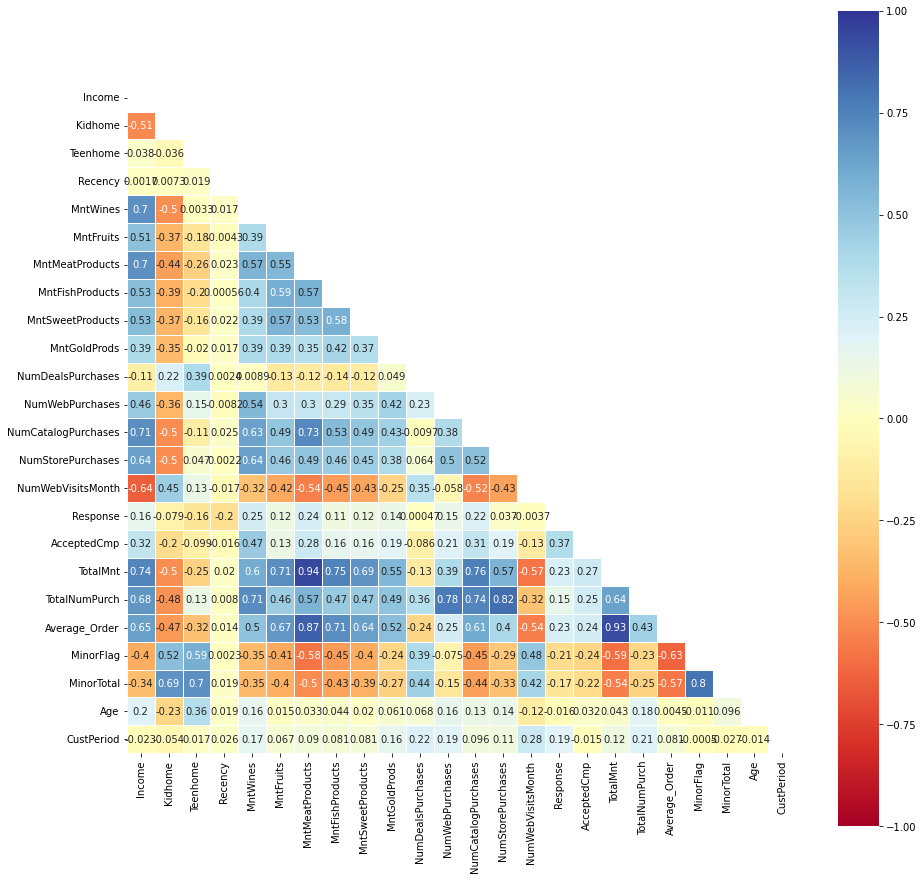

In [105]:
df_corr = df_transf3.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                    'AcceptedCmp5', 'Complain', 'Year_Birth'])

mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))

fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(df_corr.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

In [108]:
# Criar colunas dummy das classes (one-hot encoding)
colunas_dummy = ['AgeClass', 'IncomeClass', 'Education', 'Marital_Status', 'CustPeriodClass']

for coluna in colunas_dummy:
    dummies = pd.get_dummies(df_transf3[coluna], prefix=coluna[:3].lower())
    df_transf3 = pd.concat([df_transf3, dummies], axis=1)

df_transf3.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,AcceptedCmp,TotalMnt,TotalNumPurch,Average_Order,MinorFlag,MinorTotal,Age,AgeClass,IncomeClass,CustPeriod,CustPeriodClass,age_0_39,age_40_55,age_56_70,age_71+,inc_0_35,inc_35_65,inc_65_90,inc_90+,edu_Graduation,edu_Master,edu_Others,edu_PhD,mar_Divorced,mar_Married,mar_Single,mar_Together,mar_Widow,cus_0_8,cus_8_9,cus_9+,age_0_39,age_40_55,age_56_70,age_71+,inc_0_35,inc_35_65,inc_65_90,inc_90+,edu_Graduation,edu_Master,edu_Others,edu_PhD,mar_Divorced,mar_Married,mar_Single,mar_Together,mar_Widow,cus_0_8,cus_8_9,cus_9+
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,982,25,39.280000,0,0,64,56_70,35_65,9.256864,9+,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,0,16,6,2.666667,1,2,67,56_70,35_65,7.751015,0_8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,350,21,16.666667,0,0,56,56_70,65_90,8.295858,8_9,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,0,42,8,5.250000,1,1,37,0_39,0_35,7.822200,0_8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,0,249,19,13.105263,1,1,40,40_55,35_65,7.882434,0_8,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [110]:
# mantendo apenas as colunas que serão usadas no treinamento
drop_cols= ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Income', 'AgeClass', 'IncomeClass',
       'Teenhome', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'CustPeriod',
       'AcceptedCmp2', 'Complain', 'TotalMnt', 'TotalNumPurch', 'Average_Order', 'MinorFlag', 'Age', 'CustPeriodClass']

df_transf4 = df_transf3.drop(columns=drop_cols)
df_transf4.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,AcceptedCmp,MinorTotal,age_0_39,age_40_55,age_56_70,age_71+,inc_0_35,inc_35_65,inc_65_90,inc_90+,edu_Graduation,edu_Master,edu_Others,edu_PhD,mar_Divorced,mar_Married,mar_Single,mar_Together,mar_Widow,cus_0_8,cus_8_9,cus_9+,age_0_39,age_40_55,age_56_70,age_71+,inc_0_35,inc_35_65,inc_65_90,inc_90+,edu_Graduation,edu_Master,edu_Others,edu_PhD,mar_Divorced,mar_Married,mar_Single,mar_Together,mar_Widow,cus_0_8,cus_8_9,cus_9+
0,58,635,88,546,172,88,88,3,8,10,4,7,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
4,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [112]:
df_transf4['Response'].value_counts()

0    1895
1     332
Name: Response, dtype: int64

---
## 5 - Insights

In [135]:
pd.pivot_table(df_transf3, values=['ID'], index='Education', aggfunc='count')

,ID
Education,
Graduation,1122
Master,369
Others,254
PhD,482


In [132]:
pd.pivot_table(df_transf3, values=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], index='NumDealsPurchases', columns=['Response'],aggfunc='sum')

NumCatalogPurchases        NumStorePurchases          \
Response                            0      1                 0       1   
NumDealsPurchases                                                        
0                               122.0  119.0             128.0   127.0   
1                              2157.0  840.0            4539.0  1083.0   
2                               818.0  150.0            2373.0   237.0   
3                               493.0   92.0            1543.0   171.0   
4                               389.0   55.0            1012.0   123.0   
5                               205.0   37.0             527.0    88.0   
6                               114.0   37.0             339.0    68.0   
7                                88.0   33.0             212.0    47.0   
8                                35.0    3.0              86.0     7.0   
9                                 9.0    5.0              43.0    22.0   
10                                7.0   10.0              17.0    24.0   
11                                7.0   12.0              15.0    26.0   
12                               10.0    NaN              33.0     NaN   
13                                6.0    NaN              33.0     NaN   
15                               85.0    NaN              10.0     NaN   

                  NumWebPurchases         
Response                        0      1  
NumDealsPurchases                         
0                           177.0   99.0  
1                          2488.0  786.0  
2                          1688.0  214.0  
3                          1150.0  178.0  
4                           784.0  129.0  
5                           447.0   92.0  
6                           302.0   68.0  
7                           193.0   54.0  
8                            96.0    7.0  
9                            34.0   16.0  
10                           11.0   21.0  
11                            9.0   19.0  
12                           32.0    NaN  
13                           16.0    NaN  
15                            9.0    NaN

> Income:  
- Quanto maior o Income, maior o gasto com MntWines e MntMeat
- Quanto maior o Income, maior a quantidade de compras por Catãlogo
- Quanto maior o Income, menos relação com número de visitas na página Web no último mês
- Quanto maior o Income, menor a quantidade de menores de idade em casa

> Kidhome + Teenhome  
- Correlação negativa praticamente com todos atributos de Valor de Compra e Número de Compra. Principalmente vinho.  
- Único tipo de compra que tem alguma correlação positiva é com Desconto (NumDealsPurch)  
- Quem tem criança visita mais o site, mas compra menos

> Recency  
- 75% do público que comprou na Campanha6 fez a última compra no site há 56 dias ou menos.	
		
> Correlações entre produtos  
- Vinhos são comprados com maior frequência por lojas ou catálogos	
- Ao comprar vinho, há boas chances (correlação positiva) de comprar carne	
- Ao comprar peixe, há boas chances (correlação positiva) de comprar fruta ou doces	
- Carne é comprada com maior freq por catálogo	
		
> Outros
- Clientes há mais tempo tendem a responder positivamente à campanha com maior frequência do que clientes novos		
- Vinhos e carnes foram responséveis por aproximadamente 78% do total vendido nos últimos 2 anos, sendo apenas o vinho 50%		


---  
## 6. Seleção dos algorítmos

In [32]:
X = df_transf4.drop('Response', axis=1)  # atributos
y = df_transf4['Response']               # target

# Balanceamento da variável target para treinamento do modelo (SMOTE)
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

1    1895
0    1895
Name: Response, dtype: int64

In [44]:
# Definindo os cenários para cada um dos algorítmos que serão testados

scorer = make_scorer(accuracy_score) 

gscv = StratifiedKFold(n_splits=10, shuffle=True) # Validação Cruzada de 10 pastas estratificada

algorithms = {
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier())]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'naivebayes': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('selector', SelectKBest()),
            ('nb', GaussianNB())]), 
        param_grid={
            'selector__k': [3, 5, 10],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear'))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='rbf'))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

--- 
## 7. Treinamento e otimização dos modelos  

In [69]:
result = {}
t = datetime.now()

for alg, clf in algorithms.items():
  t0 = datetime.now()
  result[alg] = cross_val_score(clf, X_smote, y_smote)
  t1 = datetime.now()
  print(f"Algorítmo treinado: {alg} \t Duração: {t1-t0}")

print(f"\nTempo total: {t1-t}")
result = pd.DataFrame.from_dict(result)

Algorítmo treinado: kNN 	 Duração: 0:02:27.178156
Algorítmo treinado: tree 	 Duração: 0:00:07.279269
Algorítmo treinado: bigtree 	 Duração: 0:00:03.074601
Algorítmo treinado: naivebayes 	 Duração: 0:00:02.825117
Algorítmo treinado: svmlinear 	 Duração: 0:01:11.520578
Algorítmo treinado: svmrbf 	 Duração: 0:06:02.060223

Tempo total: 0:09:53.937944


--- 
## 8. Avaliação dos modelos

In [70]:
print(result)
result.apply(lambda x: f"{x.mean():.2f} ± {x.std():.2f}")

        kNN      tree   bigtree  naivebayes  svmlinear    svmrbf
0  0.907652  0.899736  0.878628    0.841689   0.889182  0.889182
1  0.934037  0.907652  0.886544    0.828496   0.849604  0.926121
2  0.926121  0.899736  0.894459    0.773087   0.870712  0.907652
3  0.891821  0.907652  0.902375    0.844327   0.905013  0.875989
4  0.931398  0.907652  0.907652    0.820580   0.854881  0.934037
5  0.905013  0.905013  0.899736    0.852243   0.844327  0.936675
6  0.923483  0.915567  0.870712    0.775726   0.839050  0.926121
7  0.928760  0.905013  0.907652    0.839050   0.870712  0.910290
8  0.907652  0.865435  0.899736    0.852243   0.878628  0.905013
9  0.934037  0.899736  0.894459    0.817942   0.899736  0.894459


kNN           0.92 ± 0.01
tree          0.90 ± 0.01
bigtree       0.89 ± 0.01
naivebayes    0.82 ± 0.03
svmlinear     0.87 ± 0.02
svmrbf        0.91 ± 0.02
dtype: object

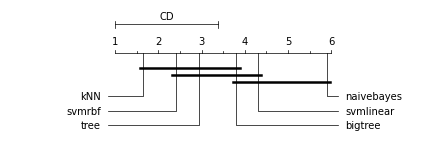

In [71]:
# Comparar todos contra todos: Friedman + Nemenyi - Diagrama de diferença crítica
# Em estatística, o teste de Nemenyi é um teste post-hoc destinado a encontrar os grupos de dados que diferem
# depois que um teste estatístico global (como o teste de Friedman) rejeitou a hipótese nula de que o desempenho
# das comparações nos grupos de dados é semelhante. O teste faz testes de desempenho em pares.

names = result.columns
avranks =  result.rank(axis=1, ascending=False).mean()
cd = Orange.evaluation.compute_CD(avranks, result.shape[0])
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
plt.show()

In [ ]:
# Estes resultados demonstram que kNN possui melhor precisão, porém o
# SVM Radial, Bigtree e tree apresentaram um resultado muito aproximado,
# demonstrando que a acurácia resultante dos 4 métodos são estatisticamente equivalentes,
# levando em consideração que a distancia critica (CD) indica que a probabilidade da diferença de
# performance entre os classificadores ocorrer por acaso é por volta de 3,45%.

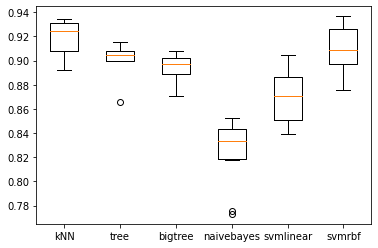

In [72]:
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.show()

---  
## 9. Seleção do modelo

In [ ]:
# Apesar de não haver diferença estatística entre tree, kNN, big tree e svm Radial, 
# o algorítmo kNN será selecionado para o problema, pois a dispensão do resultado é
# menor que o SVM Radial.

In [73]:
classifier = algorithms['kNN']
classifier.fit(X, y) # Usando a base toda
print(classifier.best_estimator_)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0.02)),
                ('knn', KNeighborsClassifier(p=1))])


In [ ]:
# classifier.predict(x)